In [8]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

with open("augmented_data.json", "rb") as fp:
    data = json.load(fp)
    
corpus = list(map(lambda t: t["sample"]["text"] + " " + t["metadata"]["gender"], data))
y = list(map(lambda t: t["sample"]["intent"], data))

corpus_train, corpus_test, y_train, y_test = train_test_split(corpus, y, test_size=0.2, random_state=7)

vectorizer = TfidfVectorizer(min_df=10)

X_train = vectorizer.fit_transform(corpus_train)
X_test = vectorizer.transform(corpus_test)

model = sklearn.linear_model.LogisticRegression(C=0.1)
model.fit(X_train, y_train)


LogisticRegression(C=0.1)

In [9]:
from lime import lime_text
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer

c = make_pipeline(vectorizer, model)

explainer = LimeTextExplainer(class_names=model.classes_)

idx = 8
exp = explainer.explain_instance(corpus_test[idx], c.predict_proba, num_features=6)

exp.as_list()


[('Does', -0.015955132395859283),
 ('the', 0.010715532697917491),
 ('Male', -0.002183609918607036),
 ('only', 0.0014157939853107714),
 ('s', -0.0002833582175185159),
 ('serve', -0.00020084349810234607)]

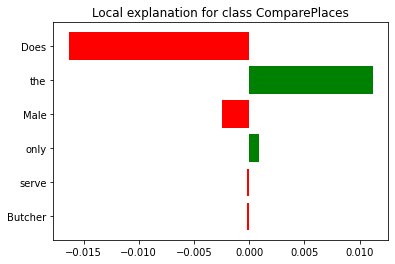

In [7]:
%matplotlib inline
fig = exp.as_pyplot_figure()